Ce notebook contient des essais généraux concernant la descente de gradient.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

Afin d'effectuer les tests, on place la grille des $z_k$ et on choisit les $\alpha_k$ de manière aléatoire.

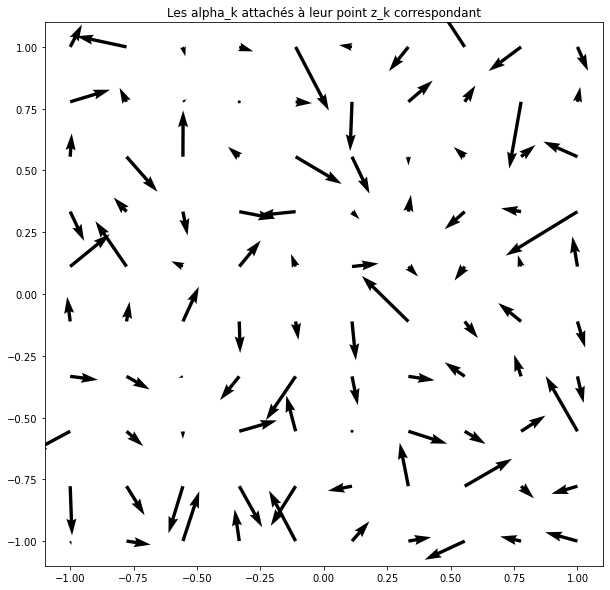

In [4]:
pas = 0.2
gauche = -1.0
droite = 1
h = int((droite - gauche)/pas)
D = h * h
zk_x, zk_y = np.meshgrid(np.linspace(gauche, droite, h),np.linspace(gauche, droite, h))
alphas_x = np.random.randn(h, h)
alphas_y = np.random.randn(h, h)

fig, ax = plt.subplots(figsize=(10, 10))
plt.quiver(zk_x, zk_y, alphas_x, alphas_y)
plt.title("Les alpha_k attachés à leur point z_k correspondant")
plt.show()

solution = [-3.38088007e+13 -2.80043455e+13]


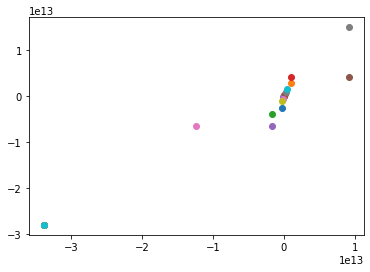

In [9]:
# Exemple de descente de gradient par approximation linéaire et avec bac search
# voir https://en.wikipedia.org/wiki/Backtracking_line_search

def toto(param):
    return param[0] * param[0] + param[1] * param[1];

points_x, points_y = [], []



def gradient_descent(f, start, dim=2, iterations=1000):
    
    if len(start) != dim:
        raise Exception("starting point must have right dimensions")
    
    # descent point
    point = start;
    
    # small variation to approximate gradient
    epsilon = 0.001;
    
    # initialise gradient var
    grad = np.array([0.0] * dim)
    
    # canonical base: e[0] = (1, 0, 0, ...) and e[dim - 1] = (0, 0, ..., 1).
    e = np.identity(dim)
    
    # backline search parameters
    tau = 0.5
    c = 0.5
    
    # temp vars
    m = 0.0
    t = 0.0
    l = 0.0
    
    for i in range(iterations):
        
        # roughly estimate gradient
        # df/dx_i (a) = (f(a + epsilon * e_i) - f(a)) / epsilon
        for d in range(dim):
            grad[d] = (f(point + epsilon * e[d]) - f(point)) / epsilon;
            
        m = np.dot(grad, grad);
        
       
        # backtracking line search for learning rate
        t = -c*m;
        # initial guess for learning rate
        l = 10.0
        
        # evaluate just one time at the current point
        value = f(point);

        while (value - f(point - l * grad)) < l * t:
            l = tau * l;

        # apply learning rate
        point -= l * grad;
        
        
        # drawing stuff
        points_x.append(point[0]);
        points_y.append(point[1]);
    return point;

result = gradient_descent(toto, [1000, 3000]);
print("solution =", result)

p = len(points_x)
for i in range(p):
    plt.plot(points_x[i],points_y[i], marker= 'o', linestyle='none');
plt.show()
